In [55]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

In [56]:
dfs = pd.read_excel('final_prepared.xlsx')

In [57]:
dfs.head()

,Unnamed: 0,AT,V,AP,RH,PE,Temp,Humid,AT_n,V_n,AP_n,RH_n
0,0,14.96,41.76,1024.07,73.17,463.26,1,4,0.372521,0.291815,0.771591,0.638204
1,1,25.18,62.96,1020.04,59.08,444.37,3,3,0.662040,0.669039,0.671863,0.449330
2,2,5.11,39.40,1012.16,92.14,488.56,1,4,0.093484,0.249822,0.476862,0.892493
3,3,20.86,57.32,1010.24,76.64,446.48,2,4,0.539660,0.568683,0.429349,0.684718
4,4,10.82,37.50,1009.23,96.62,473.90,1,4,0.255241,0.216014,0.404355,0.952547


In [58]:
X= dfs[["Temp","Humid","AT_n","V_n","AP_n","RH_n"]].values

In [59]:
y= dfs["PE"].values

In [60]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=7)

In [61]:
print("X train shape: ",X_train.shape)
print("X test  shape: ",X_test.shape)

print("y train shape: ",y_train.shape)
print("y test  shape: ",y_test.shape)

X train shape:  (35883, 6)
X test  shape:  (11961, 6)
y train shape:  (35883,)
y test  shape:  (11961,)


In [62]:
# importing module
from sklearn.linear_model import LinearRegression

polynomial_features = PolynomialFeatures(degree=3)
x_train_poly = polynomial_features.fit_transform(X_train)
x_test_poly = polynomial_features.fit_transform(X_test)

In [63]:
pr = LinearRegression()
pr.fit(x_train_poly, y_train)
y_poly_test = pr.predict(x_test_poly)

In [64]:
y_poly_pred

array([441.9237836 , 444.34480493, 451.95653132, ..., 440.30364223,
       446.51470824, 473.90777529])

In [65]:
len(y_poly_pred)

35883

In [66]:
y_test

array([482.21, 445.33, 474.08, ..., 467.21, 431.79, 442.89])

In [67]:
len(y_test)

11961

In [68]:
from sklearn.metrics import r2_score

print("R2 Score:")
r2_score(y_test, y_poly_test)

R2 Score:


0.9416201631798347

In [69]:
from sklearn.metrics import mean_absolute_error

print("Mean Absolute Error:")
mean_absolute_error(y_test, y_poly_test)

Mean Absolute Error:


3.2051238883549265

In [70]:
from sklearn.metrics import mean_squared_error

print("Mean Squared Error:")
mean_squared_error(y_test, y_poly_test)

Mean Squared Error:


16.941483715527134

In [71]:
import math

from sklearn.metrics import mean_squared_error

print("Root Mean Squared Error:")
print (math.sqrt(mean_squared_error(y_test, y_poly_test)))

Root Mean Squared Error:
4.116003366802211


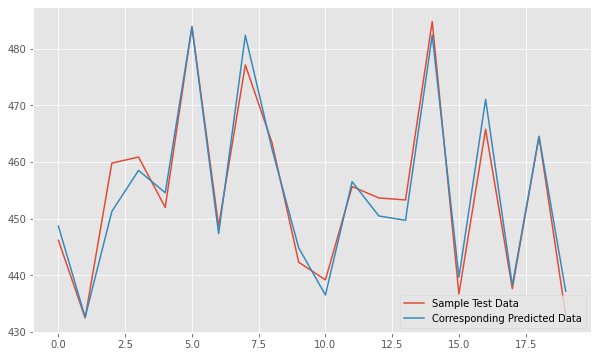

In [72]:
#the dalues from the data
plt.style.use('ggplot')
plt.rcParams['text.color'] = 'black'
plt.figure(figsize=(10, 6))
plt.plot(y_test[500:520], label = "Sample Test Data")
plt.plot(y_poly_test[500:520], label = "Corresponding Predicted Data")
plt.legend()

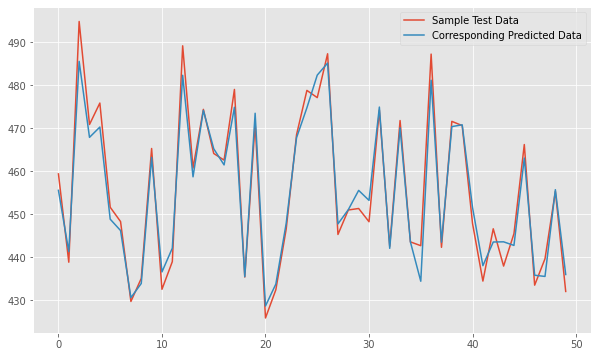

In [73]:
#the dalues from the data
plt.style.use('ggplot')
plt.rcParams['text.color'] = 'black'
plt.figure(figsize=(10, 6))
plt.plot(y_test[1000:1050], label = "Sample Test Data")
plt.plot(y_poly_test[1000:1050], label = "Corresponding Predicted Data")
plt.legend()